In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
import seaborn as sns

In [71]:
artists_dataset = pd.read_csv('dataset/tabular/artists.csv')
tracks_dataset = pd.read_csv('dataset/tabular/tracks.csv')

In [72]:
tracks_dataset

,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,...,features_duration_ms,time_signature,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre
0,4rjA5kJJWbwU1prXCvg6Fk,Grey,1,290479,False,52,5,Kölsch,album,1989,...,290479,3,275.90530,0.020,1.000,0.500,0.525,705.0,234.0,minimal-techno
1,6xzpUzzIquIyUzTLbbgSdI,Thrown,1,539229,False,45,5,Kiasmos,album,Kiasmos,...,539229,4,517.28253,0.678,0.326,0.410,0.589,1074.0,269.0,minimal-techno
2,56tXgHlSHCfgmGhwVXNizc,Routine,1,264200,False,39,5,Joris Delacroix,album,Night Visions,...,264200,3,259.04180,0.847,0.457,0.904,0.760,516.0,171.0,minimal-techno
3,0s3wIBczp6TdSJ2y8cveJl,Confronted - Anfisa Letyago Stranger Remix,1,387413,False,0,6,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,...,387414,4,387.41360,0.882,0.498,0.512,0.503,826.0,207.0,minimal-techno
4,4PSbDDd1LRYMhqPXvza6I2,Jupiter Sunrise,1,248956,False,0,1,Kollektiv Turmstrasse,compilation,10 Years Diynamic,...,248957,4,239.63574,0.882,1.000,0.474,0.459,493.0,123.0,minimal-techno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109542,0wiDjWz3U1WfwXSrWHXe2b,I'm Good (Blue) - REAPER Extended Remix,1,209655,True,23,2,David Guetta;Bebe Rexha;REAPER,single,I'm Good (Blue) [REAPER Remix],...,209655,4,200.10376,0.729,1.000,0.088,0.182,585.0,145.0,edm
109543,46n9OJc7LOIVdj8t2l5WA5,End Of The Night,1,205724,True,56,1,Danny Avila,single,End Of The Night,...,205724,4,200.98611,0.712,1.000,0.395,0.535,339.0,84.0,edm
109544,127uq83uGFapbddqiMUKky,Sexy Bitch (feat. Akon),1,195853,True,80,3,David Guetta;Akon,album,One More Love,...,195853,4,189.48643,0.814,0.990,0.097,0.330,417.0,106.0,edm
109545,0ZdUHFxifUJNqo7G4aJzoF,Savannah,1,208698,False,60,1,Diviners;Philly K.,single,Savannah,...,208698,4,197.41605,0.650,1.000,0.545,0.604,359.0,89.0,edm


In [73]:
artists_dataset

,id,name,popularity,followers,genres
0,19slOlozrbxkEIMD8L3Qsv,Fast Eddie,28.0,9904.0,"['acid house', 'chicago house', 'chicago rap',..."
1,4BIamAD25vwYldaOWTEsXd,Joe Smooth,38.0,13047.0,"['chicago house', 'classic house']"
2,0B9P7RXrukgIdmutz9XMVN,"Farley ""Jackmaster"" Funk",21.0,11933.0,"['acid house', 'chicago house', 'classic house']"
3,09xC3MewWz48F1OpYckXTZ,Jomanda,20.0,4724.0,"['chicago house', 'garage house']"
4,0RBnTX5xoVa1bDYt9Qbies,Floorplan,37.0,42515.0,"['chicago house', 'deep house', 'float house',..."
...,...,...,...,...,...
30136,2KjxvxgJvbwweNVRMSuIRG,Hoang,49.0,22134.0,[]
30137,6FPDULwgllPquFdqdzj5gi,Robin Hustin,45.0,14198.0,"['dutch edm', 'gaming edm']"
30138,7CSAJPH9eLCOvPc9jn1I6e,TobiMorrow,44.0,2339.0,['sky room']
30139,22lnnGKlaDxk8sfzCNRJuA,Diviners,47.0,74955.0,['gaming edm']


# Data Exploration and Cleaning

## Artists Dataset

### Data exploration

In [74]:
artists_dataset.describe()

,popularity,followers
count,30140.000000,3.014000e+04
mean,36.659788,4.168663e+05
std,17.229059,2.484219e+06
min,0.000000,0.000000e+00
25%,24.000000,1.472000e+03
50%,37.000000,1.581450e+04
75%,49.000000,1.186392e+05
max,100.000000,1.141635e+08


In [75]:
# Now let's check if we have duplicate names
duplicated_rows = artists_dataset[artists_dataset.duplicated('name', keep=False)]
duplicated_rows

,id,name,popularity,followers,genres
143,60alJNnwGVBdNXrx4kOfW0,Tatiana,50.0,68928.0,"['cancion infantil mexicana', 'musica para nin..."
175,41afDgAYLuPgxrh1idDJsD,Tatiana,15.0,819.0,[]
193,091dY4SjI2cy4YHdvhCjg1,Sasha,47.0,35929.0,[]
201,1UDjGxtS0sJPWn9Oc3M0Fn,Wheels on the Bus,42.0,26428.0,"[""children's music""]"
224,51ZPG7Kk4SfmmKFg0K6RBU,Hush Little Baby,28.0,438.0,[]
...,...,...,...,...,...
29904,2w5c2l70mYNDdSLifFyZjJ,Monty,33.0,17540.0,"['french dnb', 'halftime dnb']"
29913,4wTgto2eauupLwUCQ59vLK,DIESEL,9.0,10.0,[]
29978,7BXUVNB9LlrJ99RhTwFlqI,Oriente,6.0,0.0,[]
29986,3I6LbsaSbcArZLIslilSYu,RØRY,13.0,26.0,[]


We have 430 rows with duplicated names, hence we have two possibilities: 
- Dropping the rows with duplicated names
- Keeping the rows with duplicated names
- Keeping the rows with duplicated names and merging the popularity, followers and genres columns

In the data preparation phase, we will decide which approach to take.

In [76]:
# Now let's check if we have duplicate ids
artists_dataset['id'].duplicated().sum()

2

#### Checking and handling missing values

In [77]:
# Check for missing values
artists_dataset.isnull().sum()

id            1
name          2
popularity    1
followers     1
genres        1
dtype: int64

In [78]:
# print the rows with missing values
artists_dataset[artists_dataset.isnull().any(axis=1)]

,id,name,popularity,followers,genres
11872,NaN,NaN,NaN,NaN,NaN
21223,4oPYazJJ1o4rWBrTw9lm40,NaN,47.0,35655.0,[]


In [79]:
# check for duplicated rows
artists_dataset.duplicated().sum()

2

I'd say to drop the duplicated rows, and the rows that has NaN values in the name column.

In [80]:
# Drop the rows with missing values
artists_dataset = artists_dataset.dropna()
# Drop the duplicated rows
artists_dataset = artists_dataset.drop_duplicates()

### Distribution of variables

Let's start by analyzing the distribution of the popularity variable.

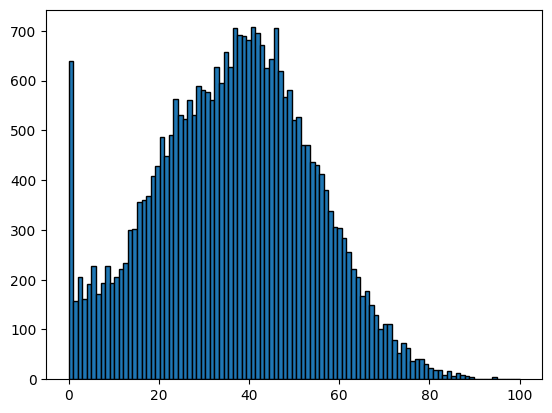

In [81]:
# Define the number of bins you want
num_bins = 100

# Create equal-sized bins using numpy's linspace function
bins = np.linspace(start=min(artists_dataset['popularity']), stop=max(artists_dataset['popularity']), num=num_bins)

# Plot the histogram with the defined bins
plt.hist(artists_dataset['popularity'], bins=bins, edgecolor='black')

# Show the plot
plt.show()

In [82]:
# How many values are in each bin
pd.cut(artists_dataset['popularity'], bins=bins).value_counts()

popularity
(40.404, 41.414]    707
(36.364, 37.374]    705
(45.455, 46.465]    705
(41.414, 42.424]    695
(37.374, 38.384]    691
                   ... 
(94.949, 95.96]       0
(95.96, 96.97]        0
(96.97, 97.98]        0
(97.98, 98.99]        0
(90.909, 91.919]      0
Name: count, Length: 99, dtype: int64

In [83]:
# Number of rows with popularity ranging from 0 to 5
artists_dataset[(artists_dataset['popularity'] >= 0) & (artists_dataset['popularity'] <= 5)].shape[0]

1355

We can see that we are dealing mainly with artists that have a popularity score between 33 and 44, followed by artists with popularity score between 22 and 33, and with only 201 artists ranging from 77 to 100. Also we have many artists (451) with popularity score of 0 and 1355 artists ranging form 0 to 5. 

The **distribution** is almost symmetrical, the distribution peaks around the median popularity score, which is close to the mean popularity score, indicative of a more balanced distribution compared to the followers. 

Now let's analyze the distribution of the followers variable.

/var/folders/6z/9_s9fn2d3td404wnft7jn6nm0000gn/T/ipykernel_50436/4116891590.py:1: RuntimeWarning: divide by zero encountered in log10
  log_bins = np.logspace(np.log10(min(artists_dataset['followers'])), np.log10(max(artists_dataset['followers'])), num=num_bins)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start


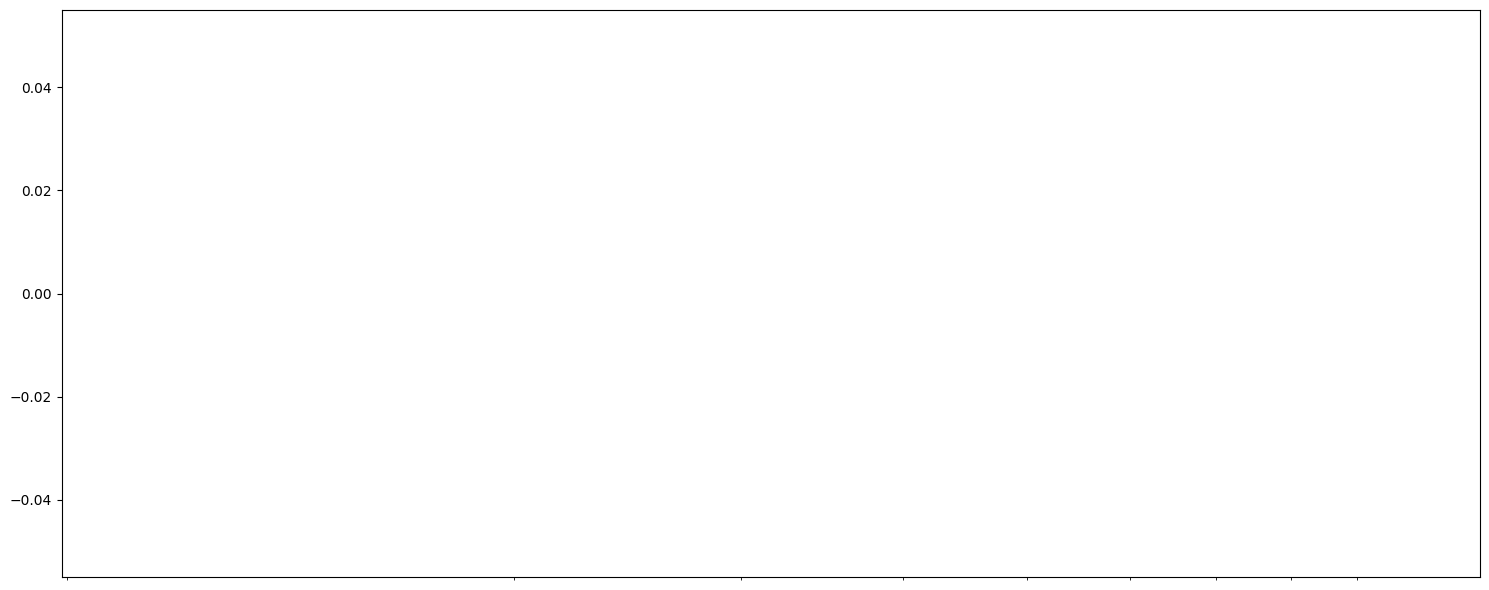

In [84]:
log_bins = np.logspace(np.log10(min(artists_dataset['followers'])), np.log10(max(artists_dataset['followers'])), num=num_bins)

# Plot the histogram with logarithmic bins
plt.figure(figsize=(15, 6))
plt.hist(artists_dataset['followers'], bins=log_bins, edgecolor='black')
plt.xscale('log')  # Set x-axis to logarithmic scale

# Set the x-axis to have ticks at the bin edges
plt.gca().xaxis.set_major_locator(ticker.FixedLocator(log_bins))  # Use FixedLocator to set the ticks

# Create custom tick labels for the bins
def custom_fmt(x, pos):
    return '{:.0f}'.format(x)

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(custom_fmt))

# Improve the layout
plt.tight_layout()

# Show the plot
plt.show()

We can see that, as expected the majority of artist has a small number of followers: the variable has a mean of approximately 416,866 and a median of 15,814 which suggests a right-skewed distribution, this also is confirmed by the histogram. The distributions of followers is heavily skewed, with a few artists having a very high number of followers and the majority having a relatively low number of followers. 

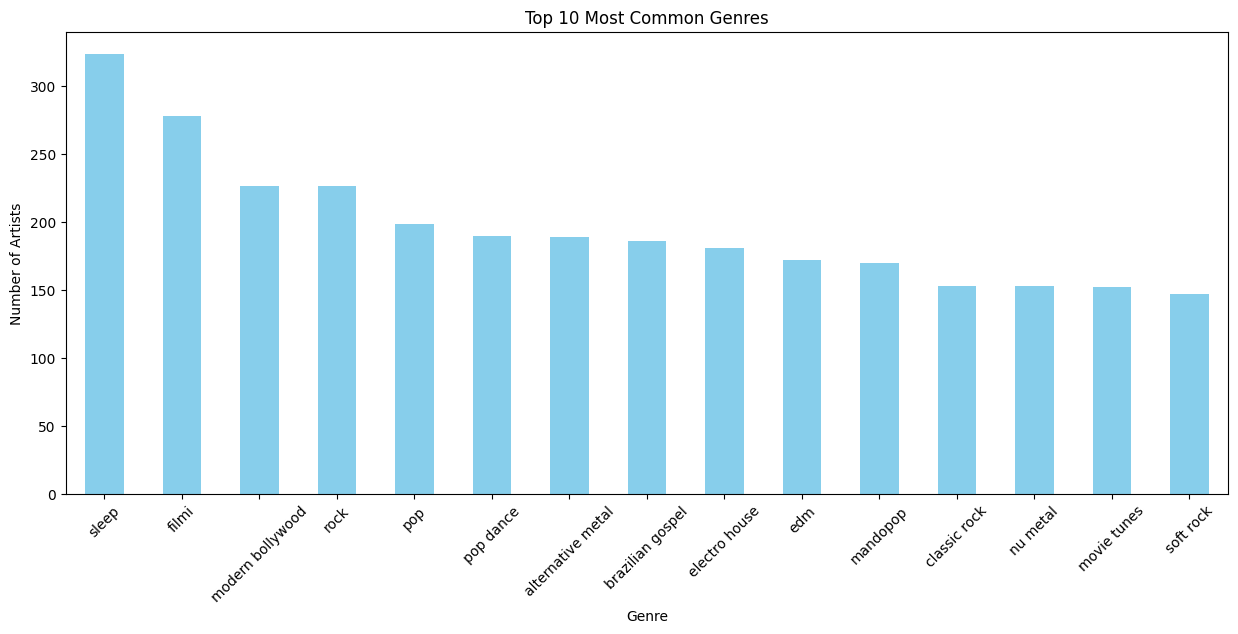

In [85]:
# Now let's check the distribution of the genres

# Split the genres column into a list of genres
genres = artists_dataset['genres'].str.split(',')

# Flatten the list of genres
flattened_genres = [genre for sublist in genres for genre in sublist]

# Create a pandas Series from the flattened list of genres
genres_series = pd.Series(flattened_genres)

# Remove ''' or '[] from the genres
genres_series = genres_series.str.replace('[', '').str.replace(']', '').str.replace("'", '').str.replace("\"",'').str.strip()

# Remove empty strings
genres_series = genres_series[genres_series != '']

# Removed strings with only spaces
genres_series = genres_series[genres_series != ' ']

# Count the occurrences of each genre
genre_counts = genres_series.value_counts()

# Plot the top 10 most common genres
genre_counts.head(15).plot(kind='bar', figsize=(15, 6), color='skyblue')

# Set the title and labels
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Artists')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
# Show the plot
plt.show()

In data preparation we could split the genres column into multiple columns, one for each genre.

In [86]:
# Count the number of unique genres in the dataset
num_unique_genres = genres_series.nunique()
num_unique_genres

4074

In [87]:
# Count the number of occurrences of each genre
genre_counts

sleep                      324
filmi                      278
modern bollywood           227
rock                       227
pop                        199
                          ... 
carnaval limburg             1
appalachian black metal      1
hard bass                    1
australian thrash metal      1
dubstep product              1
Name: count, Length: 4074, dtype: int64

I'd say that this 'filmi' genre is a typo, and it should be 'film' genre. In dataprepation phase we will fix this typo.

In [88]:
# Count the number of artists with no listed genres
num_artists_no_genres = artists_dataset[artists_dataset['genres'] == '[]'].shape[0]
num_artists_no_genres

7556

## Tracks Dataset

In [89]:
# Now let's check if we have duplicate names
duplicated_rows = tracks_dataset[tracks_dataset.duplicated('name', keep=False)]

duplicated_rows

,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,...,features_duration_ms,time_signature,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre
0,4rjA5kJJWbwU1prXCvg6Fk,Grey,1,290479,False,52,5,Kölsch,album,1989,...,290479,3,275.90530,0.020,1.000,0.500,0.525,705.0,234.0,minimal-techno
2,56tXgHlSHCfgmGhwVXNizc,Routine,1,264200,False,39,5,Joris Delacroix,album,Night Visions,...,264200,3,259.04180,0.847,0.457,0.904,0.760,516.0,171.0,minimal-techno
15,5NLoA1WpaKeBeIce3Wt4zk,Is,1,427741,False,19,2,Barem,album,After the Storm,...,427742,4,417.48320,0.869,0.931,0.695,0.461,874.0,217.0,minimal-techno
16,3s2N75intBgItaFmBSdM7z,Tesla,1,398573,False,19,1,Gui Boratto;Renato Ratier,single,Speicher 90,...,398573,4,393.71756,0.883,0.012,0.036,0.313,799.0,200.0,minimal-techno
24,24f7PzdjrmQhLjFraK5DC8,Shaker,1,378827,False,23,1,Davide Dalli Cardillo;Alessandro Grops,compilation,Ultimate Beats PANAM,...,378828,4,347.92780,0.814,0.997,0.374,0.395,808.0,203.0,minimal-techno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109532,3A7qX2QjDlPnazUsRk5y0M,2U (feat. Justin Bieber),1,194896,False,69,1,David Guetta;Justin Bieber,single,2U (feat. Justin Bieber),...,194897,4,183.33315,0.450,1.000,0.685,0.662,463.0,115.0,edm
109535,3lj59hy6FrRDyYNo8Onuud,Devil,1,176000,False,67,1,Barren Gates,single,Devil,...,176000,4,165.59311,0.739,1.000,0.251,0.325,429.0,107.0,edm
109537,6ibayfvVOby1NSKJFohtZp,Light It Up,1,185390,False,66,1,Robin Hustin;TobiMorrow;Jex,single,Light It Up,...,185391,4,179.89660,0.753,0.978,0.567,0.501,383.0,95.0,edm
109538,46MUbxLye12SKBN7xHg3CF,Control,1,166800,False,65,1,Unknown Brain;Jex;Rival,single,Control,...,166800,4,161.11166,0.217,0.862,0.706,0.778,274.0,69.0,edm


In [90]:
ids = duplicated_rows[duplicated_rows.duplicated('id', keep=False)]
ids

,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,...,features_duration_ms,time_signature,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre
85,0vgIkHFK8wpogVc1XCi18F,Second Sun,1,224332,False,30,1,Nils Hoffmann;Ben Böhmer,single,Second Sun,...,224333,4,207.44127,0.699,0.605,1.000,0.959,444.0,112.0,minimal-techno
224,7MdX25DW2YXXwCWl8fSHnq,Priceless,1,107755,False,64,1,Bhalwaan;Signature By SB,single,Priceless,...,107755,4,102.17361,0.454,0.964,0.709,0.687,263.0,66.0,hip-hop
225,1v8NfOckFEnck9gp7iyetm,Bachalo,1,165108,False,67,1,Akhil,single,Bachalo,...,165109,4,160.21770,0.562,0.992,0.752,0.716,244.0,60.0,hip-hop
226,6q9XTgfWilsnyiFofvYrIF,"Garmi (From ""Street Dancer 3D"") (feat. Varun D...",1,182738,False,68,1,Badshah;Neha Kakkar;Varun Dhawan,single,"Garmi (From ""Street Dancer 3D"")",...,182739,4,177.53397,0.279,1.000,0.341,0.330,328.0,81.0,hip-hop
229,4hAmLeBT1Ryk2oxSMMiJ7z,Oouuu,1,147200,False,65,2,Karan Aujla,single,Way Ahead,...,147200,4,139.95828,0.249,1.000,0.359,0.392,356.0,88.0,hip-hop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99872,7N02vK6QmHRiMVa6oy3HUA,Spirit of Grace,1,224840,False,29,4,Stanton Lanier,album,Open Spaces,...,224840,4,205.86812,0.120,0.078,0.695,0.748,406.0,102.0,piano
99880,35RrDnREM1xxx4YBxDHikm,I Will Always Be Yours,1,226826,False,51,2,Ben Rector,album,Magic,...,226827,4,218.65070,0.159,0.983,0.623,0.638,554.0,139.0,piano
99886,4bL2aekMQ0jdrEyBwERSmb,Lament,1,143520,False,32,1,George Winston,album,Remembrance: A Memorial Benefit (Special Edition),...,143520,4,128.22640,0.246,0.960,0.164,0.172,169.0,42.0,piano
99891,3np71XMsjRnFTol0XTEgOZ,Father in Heaven,2,147626,False,29,8,Paul Cardall,album,40 Hymns for Forty Days,...,147627,4,136.45206,0.275,0.111,0.551,0.657,184.0,46.0,piano


In [91]:
# From the tracks_dataset drop all those rows that have a duplicated id
duplicated_ids = tracks_dataset.drop_duplicates(subset='id')

duplicated_names = duplicated_ids[duplicated_ids.duplicated('name', keep=False)]

duplicated_names = duplicated_names.drop_duplicates()

duplicated_names

,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,...,features_duration_ms,time_signature,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre
0,4rjA5kJJWbwU1prXCvg6Fk,Grey,1,290479,False,52,5,Kölsch,album,1989,...,290479,3,275.90530,0.020,1.000,0.500,0.525,705.0,234.0,minimal-techno
2,56tXgHlSHCfgmGhwVXNizc,Routine,1,264200,False,39,5,Joris Delacroix,album,Night Visions,...,264200,3,259.04180,0.847,0.457,0.904,0.760,516.0,171.0,minimal-techno
15,5NLoA1WpaKeBeIce3Wt4zk,Is,1,427741,False,19,2,Barem,album,After the Storm,...,427742,4,417.48320,0.869,0.931,0.695,0.461,874.0,217.0,minimal-techno
16,3s2N75intBgItaFmBSdM7z,Tesla,1,398573,False,19,1,Gui Boratto;Renato Ratier,single,Speicher 90,...,398573,4,393.71756,0.883,0.012,0.036,0.313,799.0,200.0,minimal-techno
24,24f7PzdjrmQhLjFraK5DC8,Shaker,1,378827,False,23,1,Davide Dalli Cardillo;Alessandro Grops,compilation,Ultimate Beats PANAM,...,378828,4,347.92780,0.814,0.997,0.374,0.395,808.0,203.0,minimal-techno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109532,3A7qX2QjDlPnazUsRk5y0M,2U (feat. Justin Bieber),1,194896,False,69,1,David Guetta;Justin Bieber,single,2U (feat. Justin Bieber),...,194897,4,183.33315,0.450,1.000,0.685,0.662,463.0,115.0,edm
109535,3lj59hy6FrRDyYNo8Onuud,Devil,1,176000,False,67,1,Barren Gates,single,Devil,...,176000,4,165.59311,0.739,1.000,0.251,0.325,429.0,107.0,edm
109537,6ibayfvVOby1NSKJFohtZp,Light It Up,1,185390,False,66,1,Robin Hustin;TobiMorrow;Jex,single,Light It Up,...,185391,4,179.89660,0.753,0.978,0.567,0.501,383.0,95.0,edm
109538,46MUbxLye12SKBN7xHg3CF,Control,1,166800,False,65,1,Unknown Brain;Jex;Rival,single,Control,...,166800,4,161.11166,0.217,0.862,0.706,0.778,274.0,69.0,edm


We have 24074 rows with duplicated names and different ids, hence we have two possibilities but also different ids and differences in other attributes

In [95]:
#Among the songs with duplicated names drop keep the ones with the highest popularity and drop the others
cleaned_dataset = tracks_dataset.sort_values(by='popularity', ascending=False).drop_duplicates(subset='name', keep='first')


#Now drop the ones with duplicated ids
cleaned_dataset = cleaned_dataset.drop_duplicates(subset='id', keep='first')

cleaned_dataset

,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,...,features_duration_ms,time_signature,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre
62869,45OX2jjEw1l7lOFJfDP9fv,MONEY,1,168227,False,95,2,LISA,single,LALISA,...,168228,4,162.20880,0.789,0.989,0.043,0.253,381.0,95.0,pop
62967,4uUG5RXrOk84mYEfFvj3cK,I'm Good (Blue),1,175238,True,94,1,David Guetta;Bebe Rexha,single,I'm Good (Blue),...,175238,4,163.43945,0.808,0.789,0.898,0.773,368.0,91.0,pop
41954,5XeFesFbtLpXzIVDNQP22n,I Wanna Be Yours,1,183956,False,94,12,Arctic Monkeys,album,AM,...,183956,4,174.09161,0.097,1.000,0.545,0.533,202.0,50.0,garage
83090,2bRKxuH1o7pTmb1y4GfdEc,Clean White Noise - Loopable with no fade,1,90228,False,94,1,White Noise Baby Sleep;White Noise for Babies,album,Best White Noise for Baby Sleep - Loopable wit...,...,90228,0,90.22821,0.000,0.000,0.000,0.116,0.0,0.0,sleep
62863,0WtM2NBVQNNJLh6scP13H8,Calm Down (with Selena Gomez),1,239317,False,93,1,Rema;Selena Gomez,single,Calm Down (with Selena Gomez),...,239318,4,231.09079,0.492,1.000,0.593,0.597,424.0,105.0,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73592,0A3EiO7m1ZDEO9jSnKZ4r4,Wisemen,1,221773,True,0,29,James Blunt,compilation,Holly Jolly Christmas,...,221773,4,214.44789,0.273,1.000,0.579,0.580,556.0,138.0,rock
96275,6J9WdaHuMXk5XVCji4pvLJ,"La Traviata: Libiamo, ne' lieti calici (Brindisi)",1,193800,False,0,7,Maria Callas,album,Romantic Callas - sus mejores arias y dúos,...,193800,3,186.90321,0.000,0.474,0.778,0.497,333.0,110.0,opera
73646,1cgAtajwirHdOmdaCCVKQY,Merry Christmas Darling,1,200240,False,0,28,Christina Perri,compilation,Holly Jolly Christmas,...,200240,4,187.64046,0.062,0.688,0.184,0.418,247.0,62.0,rock
73602,6TZUBhCI4Mk5cQBa8EN0sT,Bonfire Heart,1,238000,False,0,9,James Blunt,compilation,Feeling Good - Adult Pop Favorites,...,238000,4,230.37679,0.700,1.000,0.420,0.494,459.0,115.0,rock


In the end we decided to drop the rows with duplicated names and keep the ones with the highest popularity.

Now we decided to drop all the useless columns, such as track_number, disc_number, album_total_tracks, album_release_date_precision

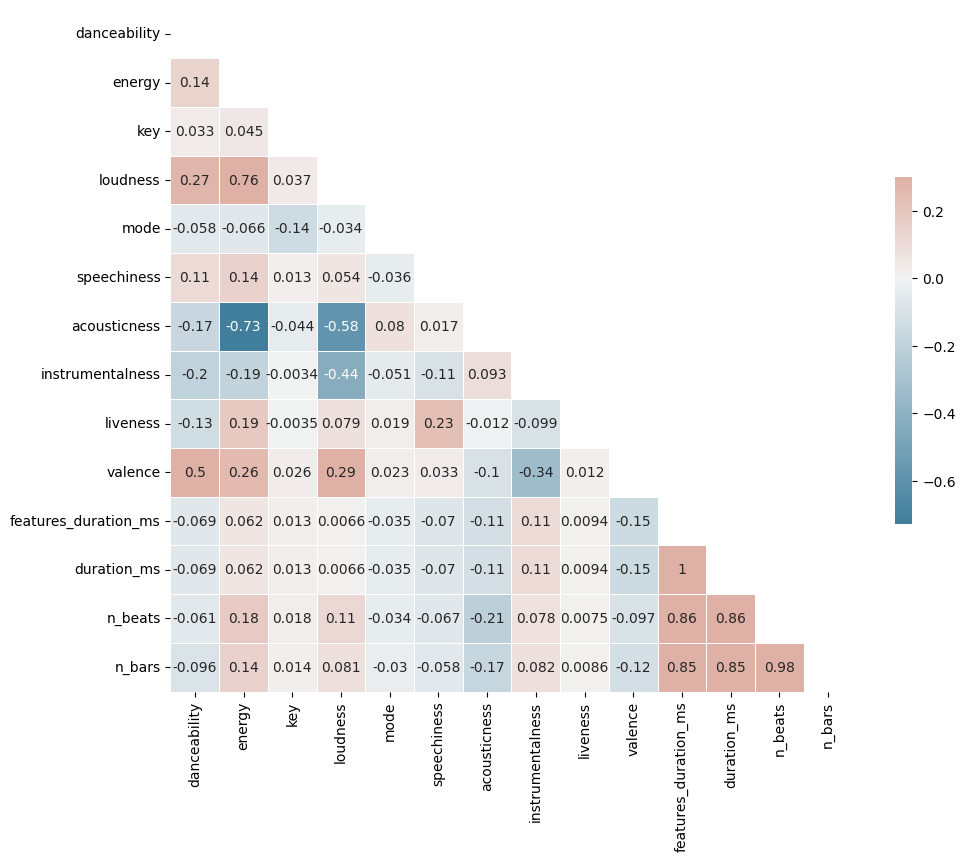

In [100]:
# Define the columns of interest
columns_of_interest = ['danceability', 'energy', 'key', 'loudness', 'mode', 
                       'speechiness', 'acousticness', 'instrumentalness', 
                       'liveness', 'valence', 'features_duration_ms', 'duration_ms',
                       'n_beats', 'n_bars']

# Compute the correlation matrix for the columns of interest
corr = cleaned_dataset[columns_of_interest].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

# Possible join of the datasets

A way to join the datasets could be to merge the datasets on the 'name' column in the 'artists' dataset and the 'artists' column in the 'tracks' dataset. However, the 'artists' column in the 'tracks' dataset contains multiple artists separated by a semicolon. To join the datasets on the 'artists' column, we need to extract the primary artist's name from the 'artists' column in the 'tracks' dataset. We can then merge the datasets on the primary artist's name.

In [92]:
# Extract primary artist's name from the 'artists' column in the 'tracks' dataset
# Assuming the primary artist is the first listed in the 'artists' column
#tracks_dataset['primary_artist'] = tracks_dataset['artists'].apply(lambda x: x.split(';')[0])

# Merge the datasets on artist name
#merged_df = pd.merge(tracks_dataset, artists_dataset, how='left', left_on='primary_artist', right_on='name', suffixes=('_track', '_artist'))

# Drop the duplicated 'name' column and any other unnecessary columns from the merge
#merged_df = merged_df.drop(columns=['name_artist'])

#merged_df

However, this approach isn't perfect because the streams of the songs are distributed among all the artists as said by [spotify it's self](https://community.spotify.com/t5/Content-Questions/Two-main-artists-on-a-song/td-p/5826073). 

Then we can adopt a more inclusive approach and join for each artist linked in a track. This however, introduces complexity, as it requires expanding the tracks dataset to create a row for each artist-track combination before joining with the 'artists' dataset.


In [93]:
# Create a new DataFrame to hold the expanded artist-track combinations
#xpanded_tracks_df = tracks_dataset.assign(artists=tracks_dataset['artists'].str.split(';')).explode('artists')

# Strip leading and trailing spaces from the exploded 'artists' column to ensure clean matching
#expanded_tracks_df['artists'] = expanded_tracks_df['artists'].str.strip()

# Merge the expanded tracks dataset with the artists dataset on artist name
#expanded_merged_df = pd.merge(expanded_tracks_df, artists_dataset, how='left', left_on='artists', right_on='name', suffixes=('_track', '_artist'))

# Preview the newly merged dataset
#expanded_merged_df